In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Read a turnstile data file
df = pd.read_csv('../data/turnstile_190302.txt')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292


In [3]:
# Strips the odd characters off the columns names
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [4]:
# convert dates and times into datetime objects
df['DATETIME'] = df.apply(lambda row: row['DATE'] + ' ' + row['TIME'], axis=1)
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%m/%d/%Y %H:%M:%S')

In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112,2019-02-23 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125,2019-02-23 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199,2019-02-23 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248,2019-02-23 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292,2019-02-23 19:00:00


In [8]:
# Make a dictionary out of the dataframe
turnstile_dict = {}
for index, row in df.iterrows():
    try:
        turnstile_dict[(row['C/A'], row['UNIT'], row['SCP'], row['STATION'])].append([row['DATETIME'], row['ENTRIES']])
    except:
        turnstile_dict[(row['C/A'], row['UNIT'], row['SCP'], row['STATION'])] = []
        turnstile_dict[(row['C/A'], row['UNIT'], row['SCP'], row['STATION'])].append([row['DATETIME'], row['ENTRIES']])

In [9]:
# Display a little dictionary information to ensure it looks correct
turnstile_dict[('A002', 'R051', '02-00-00', '59 ST')][:6]

[[Timestamp('2019-02-23 03:00:00'), 6955483],
 [Timestamp('2019-02-23 07:00:00'), 6955494],
 [Timestamp('2019-02-23 11:00:00'), 6955554],
 [Timestamp('2019-02-23 15:00:00'), 6955714],
 [Timestamp('2019-02-23 19:00:00'), 6956004],
 [Timestamp('2019-02-23 23:00:00'), 6956147]]

In [10]:
# Update the dictionary to have only a timestamp and an entry count
for key, value in turnstile_dict.items():
    updated_list = []
    last_row_entries = 0
    for entry in value:
        timestamp = entry[0]
        turnstile_count = entry[1]
        if last_row_entries != 0:
            updated_list.append([timestamp, turnstile_count - last_row_entries])
            last_row_entries = turnstile_count
        else:
            updated_list.append([timestamp, 0])
            last_row_entries = turnstile_count
    turnstile_dict[key] = updated_list
        

In [11]:
# Display a little dictionary information
turnstile_dict[('A002', 'R051', '02-00-00', '59 ST')][:6]

[[Timestamp('2019-02-23 03:00:00'), 0],
 [Timestamp('2019-02-23 07:00:00'), 11],
 [Timestamp('2019-02-23 11:00:00'), 60],
 [Timestamp('2019-02-23 15:00:00'), 160],
 [Timestamp('2019-02-23 19:00:00'), 290],
 [Timestamp('2019-02-23 23:00:00'), 143]]

In [12]:
# Create a new doictionary that has counts for days
turnstiles_daily = {}
for key, value in turnstile_dict.items():
    temp_dict = {}
    temp_list = []
    for val in value:
        try:
            temp_dict[val[0].date()] += val[1]
        except:
            temp_dict[val[0].date()] = 0
            temp_dict[val[0].date()] += val[1]
    for k, v in temp_dict.items():
        temp_list.append([k, v])
    turnstiles_daily[key] = temp_list     

In [13]:
# Display a little dictionary information
# Challenge #3
turnstiles_daily[('A002', 'R051', '02-00-00', '59 ST')][:6]

[[datetime.date(2019, 2, 23), 664],
 [datetime.date(2019, 2, 24), 419],
 [datetime.date(2019, 2, 25), 1352],
 [datetime.date(2019, 2, 26), 1405],
 [datetime.date(2019, 2, 27), 1339],
 [datetime.date(2019, 2, 28), 1391]]

In [14]:
# Challenge #4
%matplotlib inline

In [15]:
# convert turnstile info into two lists, date, and count
dates = []
counts = []
for key, value in turnstiles_daily.items():
    for val in value:
        dates.append(val[0])
        counts.append(val[1])
    break

    

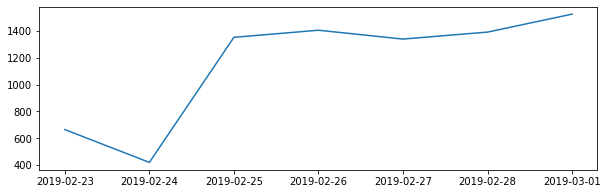

In [16]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)